In [149]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

data=pd.read_csv("Customer_Data.csv")
list1=data.columns



In [150]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [151]:

data.isnull().sum()


Customer_ID                       0
Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3548
Phone_Service                     0
Multiple_Lines                  622
Internet_Service                  0
Internet_Type                  1390
Online_Security                1390
Online_Backup                  1390
Device_Protection_Plan         1390
Premium_Support                1390
Streaming_TV                   1390
Streaming_Movies               1390
Streaming_Music                1390
Unlimited_Data                 1390
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges 

In [152]:
# Fill numeric columns
data.fillna(data.median(numeric_only=True), inplace=True)

# Fill categorical columns
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Check again
data.isnull().sum()


Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate

In [153]:
data.isnull().sum()


Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate

In [154]:
data["Customer_Status"].value_counts()
# Drop unnecessary columns
unnecessary_cols = ['Customer_ID', 'Churn_Category', 'Churn_Reason']

# Drop only if they actually exist in data (prevents KeyError)
data = data.drop(columns=[col for col in unnecessary_cols if col in data.columns], errors='ignore')

print("Remaining columns after dropping:")
print(data.columns.tolist())


Remaining columns after dropping:
['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status']


Unique Customer_Status values BEFORE cleaning: ['Stayed' 'Churned' 'Joined']
Unique Customer_Status values AFTER cleaning: ['Stayed' 'Churned' 'Joined']
Missing from expected?: set()
Target value counts after mapping:
0    4275
1    1732
2     411
Name: Customer_Status, dtype: int64
Train class distribution:
 0    3420
1    1385
2     329
Name: Customer_Status, dtype: int64
Test class distribution:
 0    855
1    347
2     82
Name: Customer_Status, dtype: int64
Confusion Matrix:
[[808  44   3]
 [139 195  13]
 [  3  42  37]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8505    0.9450    0.8953       855
           1     0.6940    0.5620    0.6210       347
           2     0.6981    0.4512    0.5481        82

    accuracy                         0.8100      1284
   macro avg     0.7475    0.6527    0.6882      1284
weighted avg     0.7985    0.8100    0.7990      1284



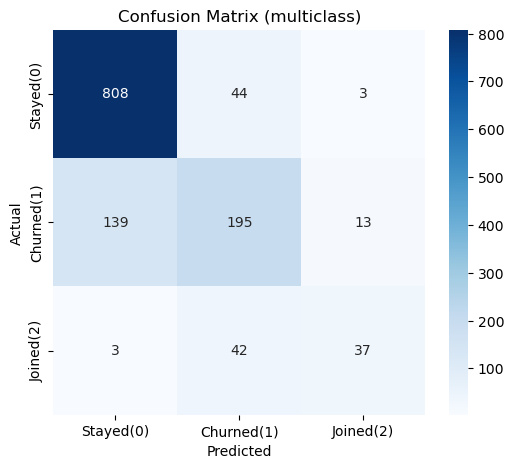

In [155]:
# ---- Clean target and inspect unique values ----
# show unique values first so you can confirm exact labels in your data
print("Unique Customer_Status values BEFORE cleaning:", data['Customer_Status'].unique())

# normalize strings: strip whitespace and standardize case (Title case)
data['Customer_Status'] = data['Customer_Status'].astype(str).str.strip().str.title()
print("Unique Customer_Status values AFTER cleaning:", data['Customer_Status'].unique())

# If your three categories are 'Stayed', 'Churned', 'Joined' (adjust names if different)
expected = {'Stayed', 'Churned', 'Joined'}
print("Missing from expected?:", expected - set(data['Customer_Status'].unique()))

# ---- Map or label-encode the target ----
# Option A: map to integers explicitly (if you prefer deterministic mapping)
mapping = {'Stayed': 0, 'Churned': 1, 'Joined': 2}
# If any of those keys are missing in data this will create NaN — check first
if not set(mapping.keys()).issubset(set(data['Customer_Status'].unique())):
    print("Warning: your data doesn't contain all expected classes. Check unique values above.")
data['Customer_Status'] = data['Customer_Status'].map(mapping)

# Alternative Option (uncomment if you prefer automatic mapping):
# from sklearn.preprocessing import LabelEncoder
# le_target = LabelEncoder()
# data['Customer_Status'] = le_target.fit_transform(data['Customer_Status'])
# print("Label mapping (target):", dict(zip(le_target.classes_, le_target.transform(le_target.classes_))))

# ---- Check for NaNs introduced by mapping ----
print("Target value counts after mapping:")
print(data['Customer_Status'].value_counts(dropna=False))

# If there are NaNs, investigate and fix them before continuing
if data['Customer_Status'].isnull().any():
    raise ValueError("There are NaNs in Customer_Status after mapping — fix class names or mapping.")

# ---- (Re)do any remaining preprocessing for features if needed ----
# Ensure categorical columns have been encoded (your list columns_to_encode)
# If you haven't handled missing categorical values, do it before label encoding:
# data = data.fillna(data.mode().iloc[0])  # quick fill; or do column-wise fills

from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in columns_to_encode:
    # ensure column is str and fill missing with mode if needed
    data[column] = data[column].astype(str).fillna(data[column].mode()[0])
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# ---- Split features and target, use stratify for small/imbalanced datasets ----
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

# ---- Train RandomForest for multiclass ----
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# ---- Predict & evaluate (multiclass) ----
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

# ---- Plot confusion matrix heatmap ----
labels = ['Stayed(0)', 'Churned(1)', 'Joined(2)']
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (multiclass)')
plt.show()


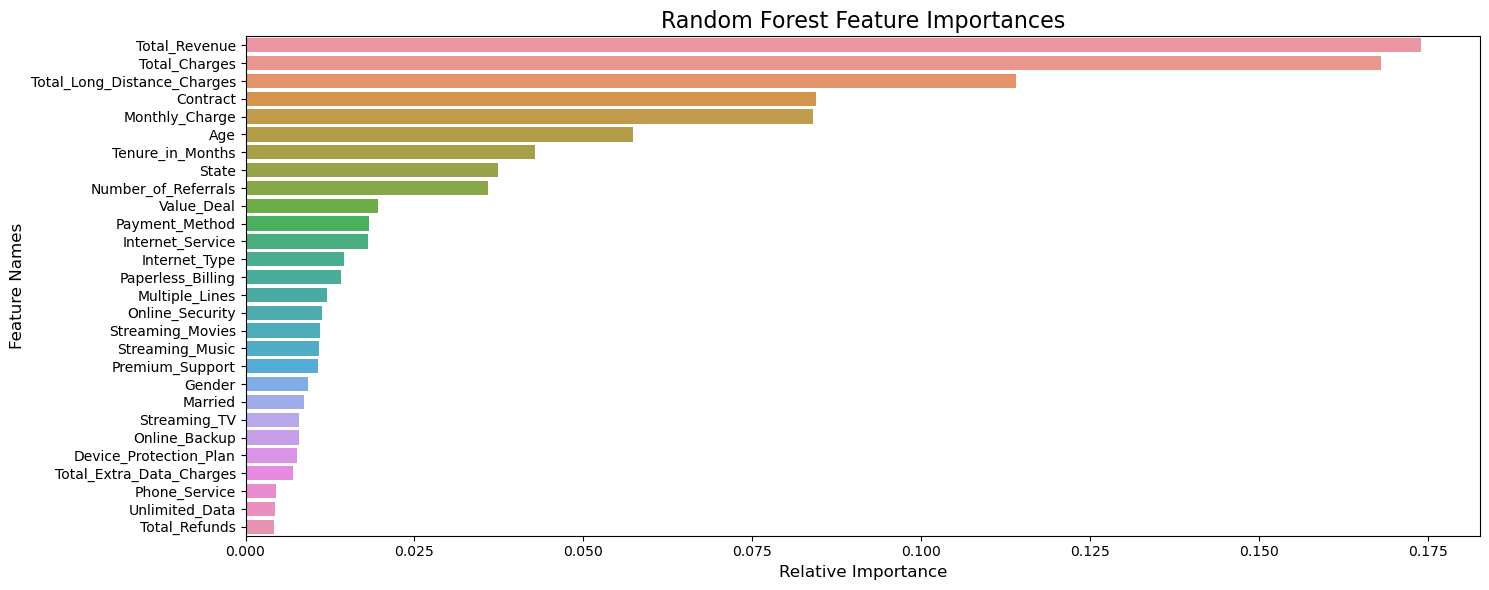

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Get feature importances from the trained model ---
importances = rf_model.feature_importances_

# --- Sort features by importance (descending order) ---
indices = np.argsort(importances)[::-1]
sorted_features = X.columns[indices]
sorted_importances = importances[indices]

# --- Plot the top features ---
plt.figure(figsize=(15, 6))
sns.barplot(x=sorted_importances, y=sorted_features, orient='h')
plt.title('Random Forest Feature Importances', fontsize=16)
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Feature Names', fontsize=12)
plt.tight_layout()
plt.show()


In [160]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ====== CONFIG: change these paths ======
input_csv  = r"Customer_Data.csv"     # your original (raw) CSV
output_csv = r"pred.csv"  # where final result will be saved


# 1️⃣ Load your original data
orig = pd.read_csv(input_csv)
print(f"✅ Loaded {len(orig)} rows, {orig.shape[1]} columns")

# 2️⃣ Detect or create Customer_ID
id_col = None
for name in ['Customer_ID', 'Customer', 'Cust_ID', 'CustomerId', 'Client_ID']:
    if name in orig.columns:
        id_col = name
        break
if id_col is None:
    id_col = 'Customer_ID'
    orig.insert(0, id_col, ['CID-' + str(i+1).zfill(6) for i in orig.index])
    print(f"⚙️ Created synthetic Customer_ID column: {id_col}")
else:
    print(f"✅ Found Customer ID column: {id_col}")

# 3️⃣ Drop columns not needed for prediction
X_new = orig.drop([id_col, 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
                  axis=1, errors='ignore').copy()

# 4️⃣ Handle missing values comprehensively
# Numeric columns → median
num_cols = X_new.select_dtypes(include=[np.number]).columns
X_new[num_cols] = X_new[num_cols].fillna(X_new[num_cols].median())

# Categorical columns → mode
cat_cols = X_new.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    mode_value = X_new[col].mode().iloc[0] if not X_new[col].mode().empty else 'Unknown'
    X_new[col] = X_new[col].astype(str).fillna(mode_value).replace('nan', mode_value).replace('None', mode_value)
    X_new[col] = X_new[col].str.strip()

# 5️⃣ Encode categorical columns safely using your saved label_encoders
for col in cat_cols:
    vals = X_new[col].astype(str).tolist()
    if col in label_encoders:
        le = label_encoders[col]
        known = set([str(x) for x in le.classes_])
        fallback = str(le.classes_[0])
        safe_vals = [v if v in known else fallback for v in vals]
        X_new[col] = le.transform(safe_vals)
    else:
        tmp = LabelEncoder()
        X_new[col] = tmp.fit_transform(vals)

# 6️⃣ Align feature order with training features if available
if 'X' in globals():
    for c in X.columns:
        if c not in X_new.columns:
            X_new[c] = 0
    X_new = X_new[X.columns]

# 7️⃣ Predict churn
pred_labels = rf_model.predict(X_new)
pred_probs  = rf_model.predict_proba(X_new)[:, 1] if hasattr(rf_model, "predict_proba") else None

# 8️⃣ Attach predictions to the original DataFrame
orig['Customer_Status_Predicted'] = pred_labels
if pred_probs is not None:
    orig['Churn_Prob'] = pred_probs

# 9️⃣ Decode numeric categorical columns back to readable form
for col, le in label_encoders.items():
    if col in orig.columns:
        try:
            if pd.api.types.is_integer_dtype(orig[col]) or pd.api.types.is_float_dtype(orig[col]):
                orig[col] = le.inverse_transform(orig[col].astype(int))
        except Exception:
            pass

# 🔟 Fill any remaining NaNs in the output before saving (safety step)
orig = orig.fillna({
    col: 'Unknown' if orig[col].dtype == object else 0
    for col in orig.columns
})

# 11️⃣ Save final results (Power BI–ready)
orig.to_csv(output_csv, index=False)
print(f"✅ Predictions saved to: {output_csv}")
print(f"✅ Columns in saved file: {orig.columns.tolist()}")


✅ Loaded 6418 rows, 32 columns
✅ Found Customer ID column: Customer_ID
✅ Predictions saved to: pred.csv
✅ Columns in saved file: ['Customer_ID', 'Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason', 'Customer_Status_Predicted', 'Churn_Prob']


In [162]:
pd.read_csv("pred.csv")

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predicted,Churn_Prob
0,19877-DEL,Male,35,No,Delhi,7,27,Unknown,Yes,No,...,593.30,0.00,0,381.51,974.81,Stayed,Unknown,Unknown,0,0.025
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,Unknown,Yes,Yes,...,542.40,38.33,10,96.21,610.28,Stayed,Unknown,Unknown,0,0.145
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,1,0.825
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1,0.920
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,Unknown,Yes,No,...,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,1,0.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,43397-UTT,Female,41,No,Uttar Pradesh,6,33,Unknown,Yes,Yes,...,896.75,0.00,0,37.96,934.71,Churned,Competitor,Competitor made better offer,1,0.550
6414,22240-HAR,Male,51,Yes,Haryana,0,19,Deal 1,No,Unknown,...,3139.80,0.00,0,0.00,3139.80,Stayed,Unknown,Unknown,0,0.015
6415,78682-KER,Female,65,Yes,Kerala,14,25,Unknown,Yes,Yes,...,2869.85,0.00,0,599.64,3469.49,Churned,Dissatisfaction,Product dissatisfaction,1,0.875
6416,17816-ODI,Male,23,No,Odisha,2,10,Unknown,Yes,Yes,...,4480.70,0.00,0,2107.52,6588.22,Stayed,Unknown,Unknown,0,0.030


In [142]:

# ======== FILE PATHS ========
prediction_excel = r"C:\yourpath\Prediction_Data.xlsx"
prediction_csv   = "Predictions.csv"
sheet_name = 'vw_JoinData'
# ============================

# 1️⃣ Load data
new_data = pd.read_excel(prediction_excel, sheet_name=sheet_name)


In [143]:
new_data

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,1,35,0,4,7,27,1,1,0,1,...,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81
1,0,45,1,12,14,13,1,1,1,1,...,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28
2,1,51,0,21,4,35,4,1,0,1,...,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45
3,1,79,0,9,3,21,3,1,0,1,...,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51
4,0,80,0,17,3,8,1,1,0,1,...,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,0,41,0,19,6,33,1,1,1,1,...,1,0,1,1,74.40,896.75,0.00,0,37.96,934.71
6414,1,51,1,6,0,19,0,0,0,1,...,1,2,0,1,45.25,3139.80,0.00,0,0.00,3139.80
6415,0,65,1,10,14,25,1,1,1,1,...,1,0,1,0,74.95,2869.85,0.00,0,599.64,3469.49
6416,1,23,0,13,2,10,1,1,1,1,...,1,1,1,1,70.15,4480.70,0.00,0,2107.52,6588.22
